<a href="https://colab.research.google.com/github/Navneet2409/bike-sharing-demand-prediction/blob/main/Bike_Sharing_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


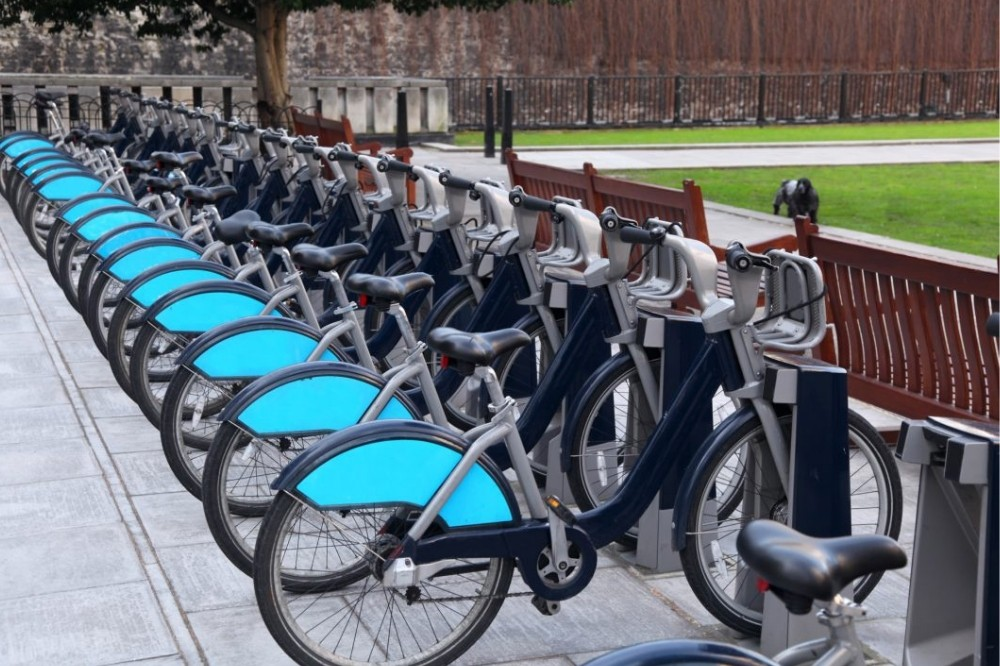

# **GitHub Link -**

https://github.com/Navneet2409/bike-sharing-demand-prediction

# **Project Summary -**

This project is about the use of bike rentals in metropolitan areas as a way to improve mobility and convenience for the public. The challenge is to ensure a consistent supply of bikes for rental. The bike-sharing systems are automated and allow individuals to rent and return bikes at different locations. The project focuses on predicting the demand for the bike-sharing program in Seoul using historical data on factors such as temperature and time.

* There were approximately 7787 records and 11 attributes in the dataset.

* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

* Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

* The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

* Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

* The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Feature Engineering
7.   Model Training
8.   Model Implementaion.
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

A growing number of metropolitan areas are now offering bike rentals as a means of enhancing mobility convenience. The public must have access to the rental bike at the appropriate time so that it reduces the amount of time people have to wait. Providing the city with a consistent supply of rental bikes becomes a major concern at some point. The most important part is the expected hourly bicycle count for the constant supply of rental bicycles.


The membership, rental, and bike return procedures in a city are all automated by a network of locations in bike-sharing systems. Through these Bike Sharing systems, individuals can rent bikes from one location and return them to another or the same location as needed. A bicycle can be rented out to individuals through membership or upon request. This procedure is overseen by a citywide network of automated stores.


In this dataset, we predict the demand for the Bike Sharing Program in Seoul based on historical usage patterns about temperature, time, and other data.

### **Motivation** : -  

Predicting how many bikes will be needed at any given time and day is one of the most important business issues. Having fewer bikes wastes resources (both in terms of bike maintenance and the land/bike stand required for parking and security), while having more bikes results in revenue loss—ranging from a short-term loss due to the loss of immediate customers to a potential longer-term loss due to the loss of future customer base. Therefore, these businesses would be able to function effectively if they had an estimate of the demands.

## **2. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process 
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [ ]:
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the Seol bike data set from the drive
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Bike Sharing Demand Prediction - Navneet Keshri/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns 
bike_df.shape

(8760, 14)

In [ ]:
print(f'number of rows : {bike_df.shape[0]}  \nnumber of columns : {bike_df.shape[1]}')

number of rows : 8760  
number of columns : 14


### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We have 14 columns. most of them are numerical except Seasons, Holiday, Functioning Days, and Date

We have to convert the Date column into the DateTime datatype.

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or procedures for collecting data. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [ ]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
value = len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there were no duplicate entries in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [ ]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


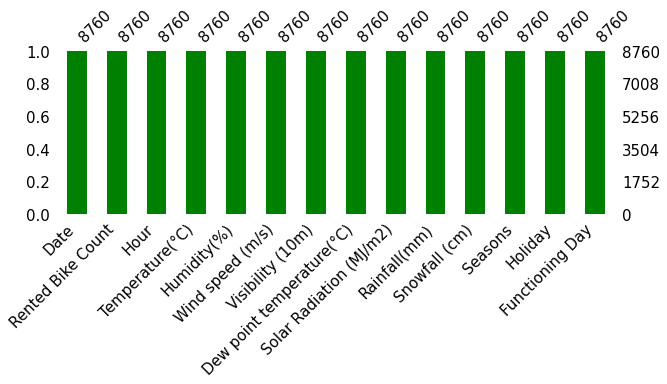

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

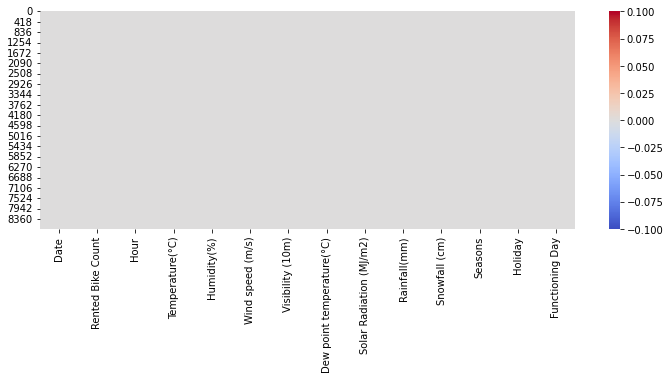

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(bike_df.isna(), cmap = 'coolwarm')

From the above command, we noticed that every column has 0 number of rows null values. This seems to be clean data and there is no missing data in any of the 'rows and columns'.

### What did you know about your dataset?

The aforementioned dataset has 14 columns and 8760 rows. The dataset does not contain any duplicate or missing values.

We have to forecast the demand for bike-sharing using the provided dataset, which comes from the market for bike-sharing services.

Analytical studies on the likelihood of a customer seeking bike sharing are known as demand prediction. The objective is to comprehend and manage demand and supply equilibrium throughout the day.


## **3. Understanding Your Variables**

###  Columns

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###  Statistical Summary

In [ ]:
# Dataset Describe
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


###  Variables Description

The dataset contains weather information (Temperature, Humidity, Windspeed, 
Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

### Unique Values

In [ ]:
# print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


### Observations: 

* We are focusing on several key columns of our dataset, including  'Hour', 'Holiday', 'Functioning Day', 'Rented Bike Count', 'Temperature(°C)', and 'Seasons', as they contain a wealth of information.
* By utilizing these features, we plan to create a regression model and implement various regression algorithms. 
* There is a column 'Hour' which might be considered a categorical feature or maybe a numerical feature based on the data we will try both and see the result difference.

## **4. EDA**

#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.


### **4.1 Creating Some New Features**

In [ ]:
# Renaming complex columns name for the sake of simplicity    **(Not a necessary step to do)**
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

##### Breaking down date column

In [ ]:
# Splitting Date into year, month, day & day_name
bike_df.date = pd.to_datetime(bike_df.date)

bike_df['day'] = bike_df['date'].dt.day
bike_df['month'] = bike_df['date'].dt.month
bike_df['year'] = bike_df['date'].dt.year
bike_df['weekday'] = bike_df['date'].dt.day_name()

# droping Date column
bike_df.drop('date', axis=1, inplace=True)

In [ ]:
bike_df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

The hours of the day have a clear sequence - 9 am is closer to 10 am than it is to 8 am and it is farther from 6 pm. It is most accurately classified as a discrete ordinal variable. We will treat hour as a categorical value and will switch to numerical and see the result difference.

In [ ]:
def session(x):
   
    ''' 
    For exploratory data analysis (EDA) purposes, the "Hour" column can be converted into categorical variables
    such as "Morning", "Noon", and "Night", without altering the existing label encoding format of the "Hour" column. 
    This conversion is not necessary for model training.
    '''
    
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make new category column
bike_df['session'] = bike_df['hour'].apply(session)

### **4.2 Column: 'rented_bike_count'**

In [ ]:
print(f'Min Count: {bike_df.rented_bike_count.min()}')
print(f'Max Count: {bike_df.rented_bike_count.max()}')

Min Count: 0
Max Count: 3556


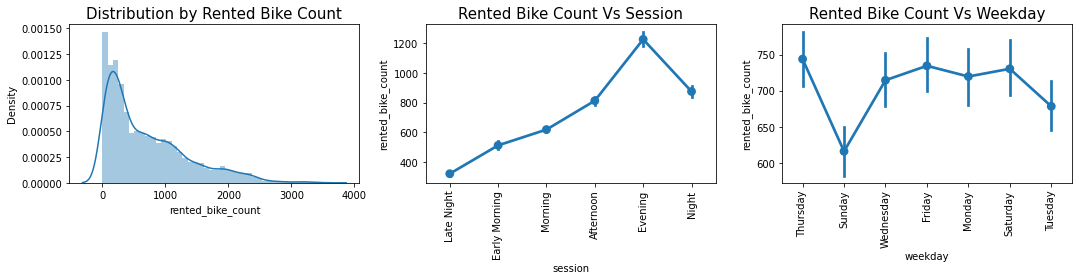

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Distribution analysis
dist = sns.distplot(bike_df['rented_bike_count'], ax=ax[0])
dist.set_title('Distribution by Rented Bike Count', size=15)

# Bi-variate analysis
# Rented Bike Count Vs Session
point = sns.pointplot(data=bike_df, x='session', y='rented_bike_count', ax=ax[1])
point.set_title('Rented Bike Count Vs Session', size=15)
# Set x-ticks rotation to 90 degrees
point.set_xticklabels(point.get_xticklabels(), rotation=90)

# Bi-variate analysis
# Rented Bike Count Vs Weekday
point = sns.pointplot(data=bike_df, x='weekday', y='rented_bike_count', ax=ax[2])
point.set_title('Rented Bike Count Vs Weekday', size=15)
# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:** 
* Distribution of Rented Bike Count is positively skewed and it has a lot of outlier. We will treat it later.
* Demand for rented bike increases in the evening.
* There is least demand for rented bike on Sunday.

### **4.3 Column: 'hour'**

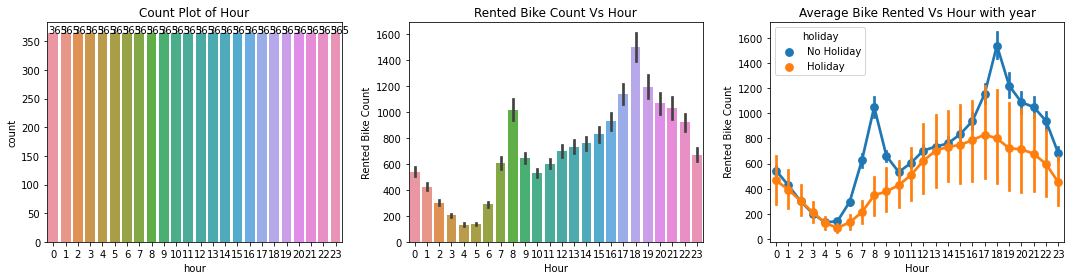

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='hour', ax=ax[0])
count.set_title('Count Plot of Hour')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Hour
bar = sns.barplot(data=bike_df, x='hour', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Hour', ylabel='Rented Bike Count', title='Rented Bike Count Vs Hour')

# Multi-variate analysis
point = sns.pointplot(data=bike_df, x='hour', y='rented_bike_count', hue='holiday', ax= ax[2])
point.set(xlabel='Hour', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Hour with year')

plt.tight_layout()
plt.show()

**Observation:** 
* Every hour has equal number of counts in dataset. 
* Demand of rented bike count is higher at 8 AM and 6 PM indicating a high demand at business hours.
* Rented Bike Count follows 2 patterns one for holiday and another for no holiday. 
* Holiday: The first pattern is where there is a peak in the rentals at around 8 am and another at around 6 pm. These correspond to working local bikers who typically go to work on the working day which is Monday to Friday.
* Non-Working Day: Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probably tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday

### **4.4 Column: 'temperature'**

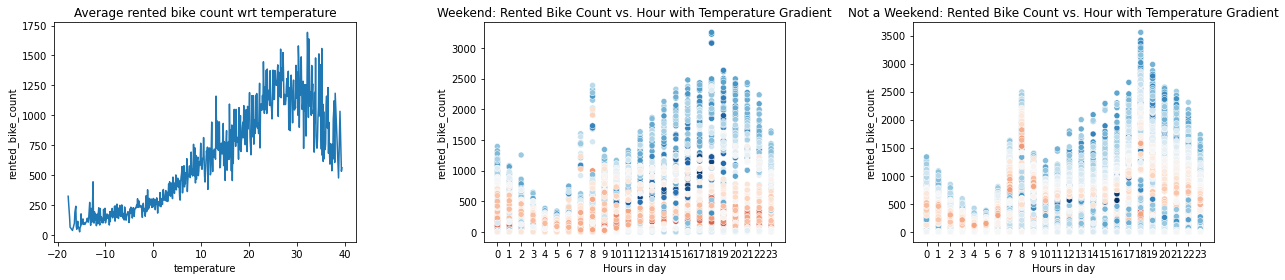

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

# Univariate analysis
# Dependent Column Value Vs temperature
# group temperature column
temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

line = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count, ax = ax[0])
line.set_title('Average rented bike count wrt temperature')

# Multi-variate analysis
# Dependent Column Value Vs hour with temperature
bike_df_nw = bike_df[(bike_df.weekday != 'Saturday') & (bike_df.weekday != 'Sunday')]
bike_df_w = bike_df[(bike_df.weekday == 'Saturday') | (bike_df.weekday == 'Sunday')]

# Weekend
scatter2 = sns.scatterplot(x=bike_df_w.hour, y=bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap="RdBu", ax =ax[1])
scatter2.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter2.set_title('Weekend: Rented Bike Count vs. Hour with Temperature Gradient')

# Not a Weekend
scatter = sns.scatterplot(x=bike_df_nw.hour, y=bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature,cmap="RdBu", ax = ax[2])
scatter.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter.set_title('Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')


plt.tight_layout()
plt.show()

**Observation:**
* We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature.
* People prefer renting bikes in warm environments. Therefore, the demand for bicycles will be high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.
* However, there is a slight decrease in count if the temperature is too high (darkest of the blue dots).

### **4.5 Column: 'humidity'**

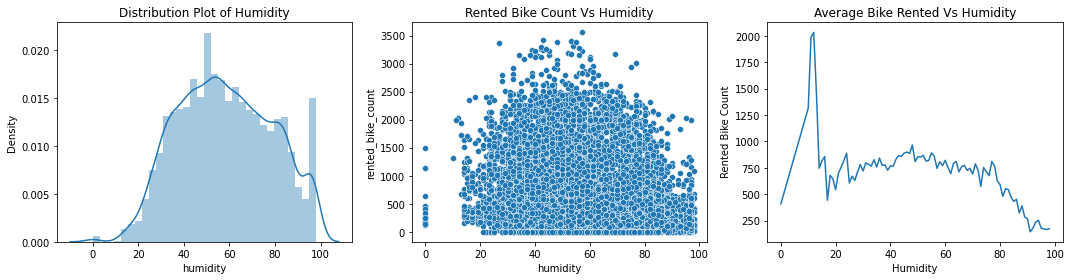

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.humidity, ax = ax[0])
dist.set_title('Distribution Plot of Humidity')

# Bi-variate analysis 
# Rented Bike Count Vs Wind Speed
scatter = sns.scatterplot(data=bike_df, x='humidity', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='humidity', ylabel='rented_bike_count', title='Rented Bike Count Vs Humidity')

# Line Plot
group_wind_speed = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='humidity', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Humidity', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the plots above that the average number of bikes rented goes up and down sharply with peak is at around 50. For the number of rented bikes in demand, the most preferred humid environment is 20-90.

### **4.6 Column: 'wind_speed'**

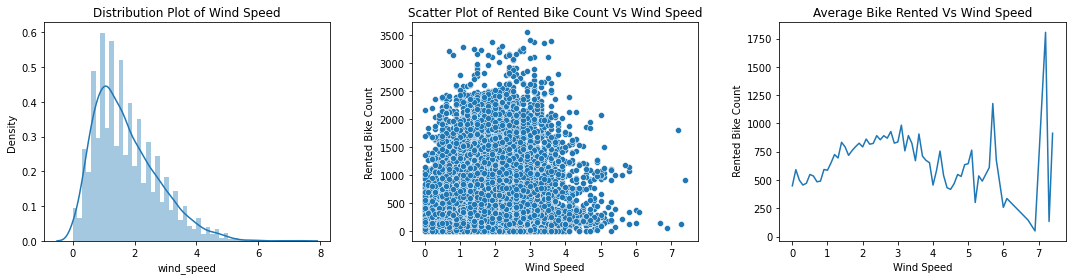

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.wind_speed, ax = ax[0])
dist.set_title('Distribution Plot of Wind Speed')

# Bi-variate analysis 
# Rented Bike Count Vs Wind Speed
scatter = sns.scatterplot(data=bike_df, x='wind_speed', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Wind Speed', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Wind Speed')

# Line Plot
group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Wind Speed', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from distribution plot that wind speed is slighly positively skewed.
* Scatter Plot tells us about the distribution of the wind speed and rented bike count, and how the values of the two variables are related to each other.
* Line plot tells us that people prefer moderate wind but there is an spike at wind speed 7.

### **4.7 Column: 'visibility'**

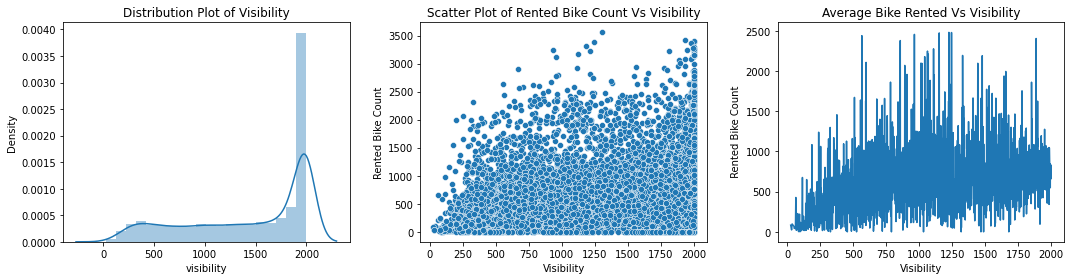

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.visibility, ax = ax[0])
dist.set_title('Distribution Plot of Visibility')

# Bi-variate analysis 
# Rented Bike Count Vs Visibility
scatter = sns.scatterplot(data=bike_df, x='visibility', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Visibility', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Visibility')

# Line Plot
group_visibility = bike_df.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_visibility, x='visibility', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Visibility', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Visibility')

plt.tight_layout()
plt.show()


**Observation:**
* Visibility is highly skewed to left side.
* We can see from these plots above that as visibility rises, so does rented_bike_count.

### **4.8 Column: 'dew_point_temperature'**

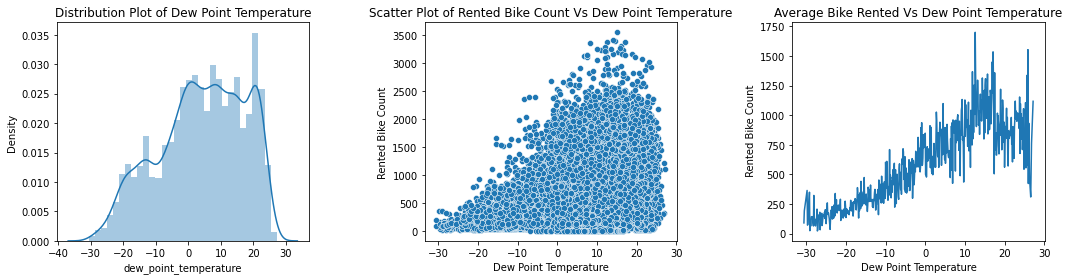

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.dew_point_temperature, ax = ax[0])
dist.set_title('Distribution Plot of Dew Point Temperature')

# Bi-variate analysis 
# Rented Bike Count Vs Dew Point Temperature
scatter = sns.scatterplot(data=bike_df, x='dew_point_temperature', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Dew Point Temperature', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

# Line Plot
group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Dew Point Temperature', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Dew Point Temperature')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from above plots that dew point temperature is negatively skewed with a clear positive relationship with rented bike count.
* The average number of bikes rented with dew point temperature increases steadily, with a slight decrease at the highest dew point temperature.
* Line plot of dew point temperature is very similar to temperature pattern.

### **4.9 Column: 'solar_radiation'**

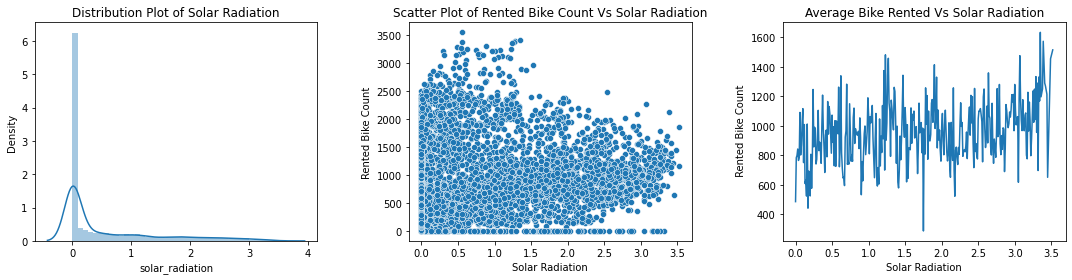

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.solar_radiation, ax = ax[0])
dist.set_title('Distribution Plot of Solar Radiation')

# Bi-variate analysis 
# Rented Bike Count Vs Solar Radiation
scatter = sns.scatterplot(data=bike_df, x='solar_radiation', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Solar Radiation', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Solar Radiation')

# Line Plot
group_solar_radiation = bike_df.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Solar Radiation', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Solar Radiation')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the distribution plot that solar radiation is highly skewed to positive.
* The average number of bikes rented goes up with solar radiation. 
* Additionally, this column is directly related to the temperature column.

### **4.10 Column: 'rainfall'**

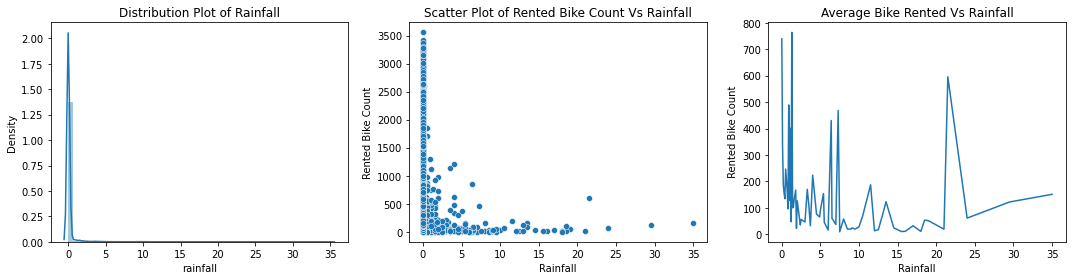

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.rainfall, ax = ax[0])
dist.set_title('Distribution Plot of Rainfall')

# Bi-variate analysis 
# Rented Bike Count Vs Rainfall
scatter = sns.scatterplot(data=bike_df, x='rainfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Rainfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Rainfall')

# Line Plot
group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Rainfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Rainfall')

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of rainfall is highly skewed to positive side.
* People prefer almost no or very less rainfall.

### **4.11 Column: 'snowfall'**

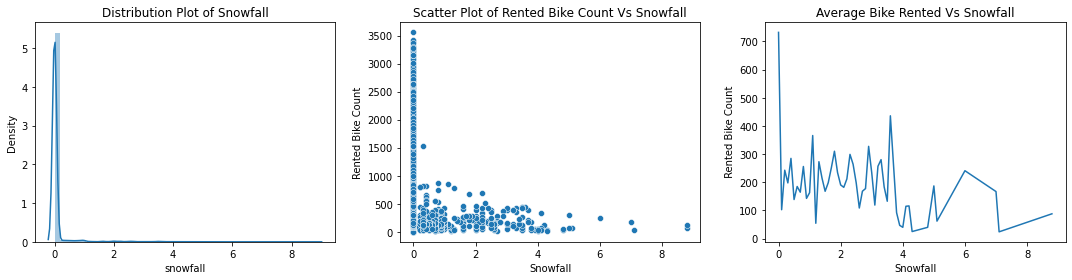

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.snowfall, ax = ax[0])
dist.set_title('Distribution Plot of Snowfall')

# Bi-variate analysis 
# Rented Bike Count Vs Snowfall
scatter = sns.scatterplot(data=bike_df, x='snowfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Snowfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Snowfall')

# Line Plot
group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Snowfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Snowfall')

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of snowfall is highly skewed to positive side.
* People prefer almost no or very less snowfall.

### **4.12 Column: 'seasons'**

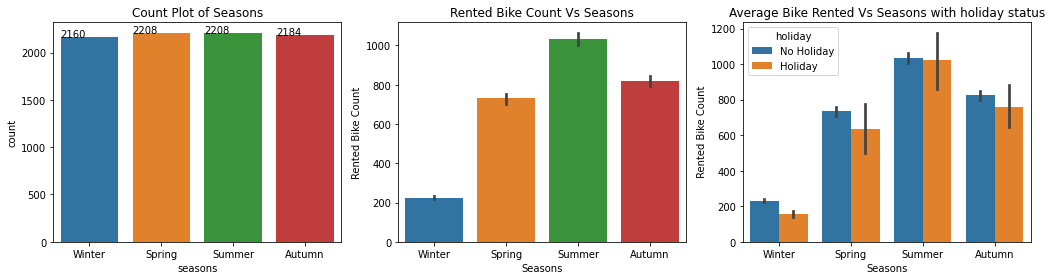

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='seasons', ax=ax[0])
count.set_title('Count Plot of Seasons')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Seasons
bar = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Rented Bike Count Vs Seasons')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='seasons', y='rented_bike_count', hue='holiday', ax= ax[2])
cat.set(xlabel='Seasons', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has 4 seasons and every seasons has more than 2000 counts.
* The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.
* In every season on a no holiday rented_bike_count has more number of count than on a holiday.

### **4.13 Column: 'holiday'**

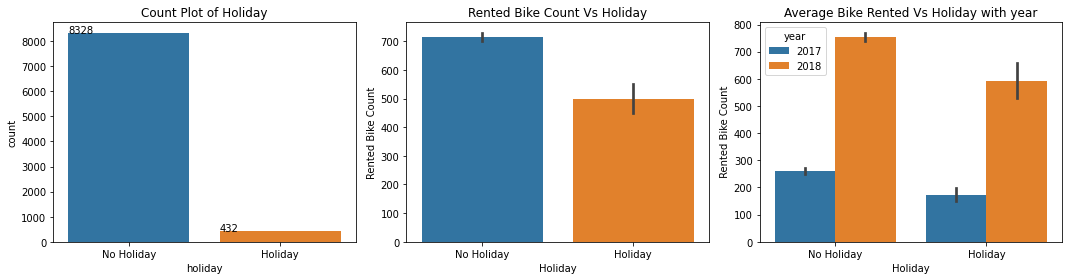

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='holiday', ax=ax[0])
count.set_title('Count Plot of Holiday')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Holiday
bar = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Holiday', ylabel='Rented Bike Count', title='Rented Bike Count Vs Holiday')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', hue='year', ax= ax[2])
cat.set(xlabel='Holiday', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Holiday with year')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has more records of No holiday than holiday which is obvious as most of the days are working days.
* When there are no holidays, demand for bike sharing is higher than when there are holidays, indicating that business-related bike rentals are preferred.
* Dataset has more records of 2018 than 2017.

### **4.14 Column: 'functioning_day'**

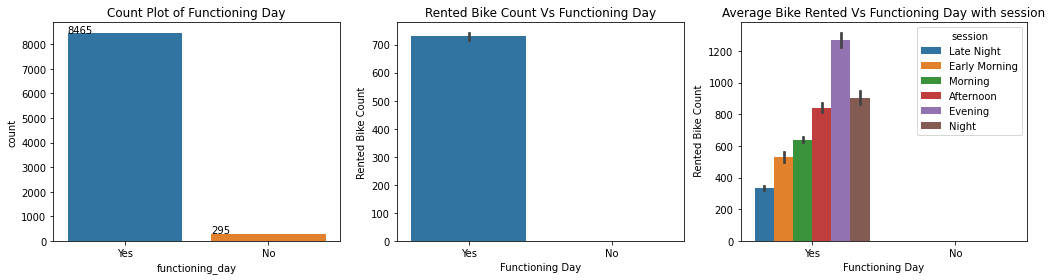

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='functioning_day', ax=ax[0])
count.set_title('Count Plot of Functioning Day')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Functioning Day
bar = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Functioning Day', ylabel='Rented Bike Count', title='Rented Bike Count Vs Functioning Day')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='functioning_day', y='rented_bike_count', hue='session', ax= ax[2])
cat.set(xlabel='Functioning Day', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Functioning Day with session')

plt.tight_layout()
plt.show()

**Observation:**
* Dataset has more records of Functioning Day than no functioning day which is obvious as most of the days are working days.
* Even though we have some counts of no functioning day still there is no bike rented on a no functioning day.
* On a functioning day, evening session has most number of rented bike count.

## **5. Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

### **5.1 Duplicate Values**

In [ ]:
# counting duplicate values
bike_df.duplicated().sum()

0

There is no duplicate record in the dataset

### **5.2 Missing Values**

In [ ]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
day                      0
month                    0
year                     0
weekday                  0
session                  0
dtype: int64


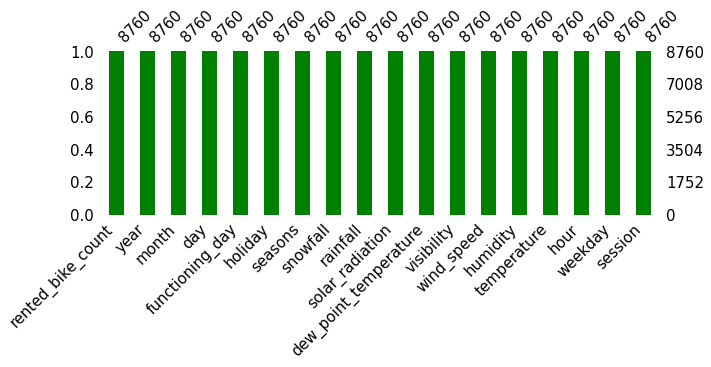

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

Fortunately there is no missing value in the dataset

### **5.3 Skewness**

In [ ]:
# statistical summary
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rented_bike_count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

In [ ]:
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in bike_df.columns:  
  if bike_df[col].nunique() > 35:
    numerical_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']
Categorical Features : ['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'year', 'weekday', 'session']


In [ ]:
# we do not want any transformation and outlier removal from our target variable as it is possible to have outlier is Seoul Environment
numerical_features.remove('rented_bike_count')
numerical_features.remove('rainfall')
numerical_features.remove('snowfall')


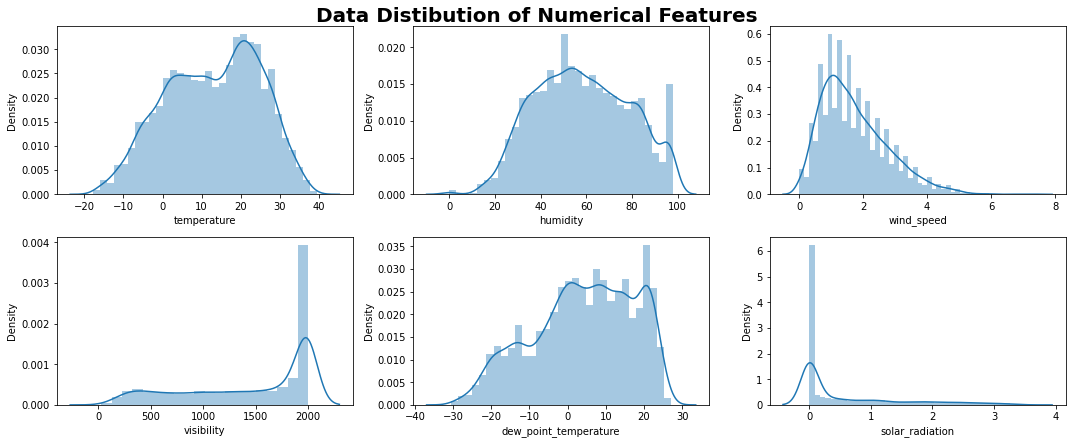

In [ ]:
# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                       # subplots 2 rows, 3 columns

  # dist plots
  sns.distplot(bike_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    

**Observation:**

* For numerical features, we can see that the majority of distributions are right-skewed. The distribution of rainfall, snowfall, solar radiation is highly skewed to the right. It demonstrates that these columns has many outliers. Some columns are negatively skewed.
* Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.

### **5.4 Treating Outliers**

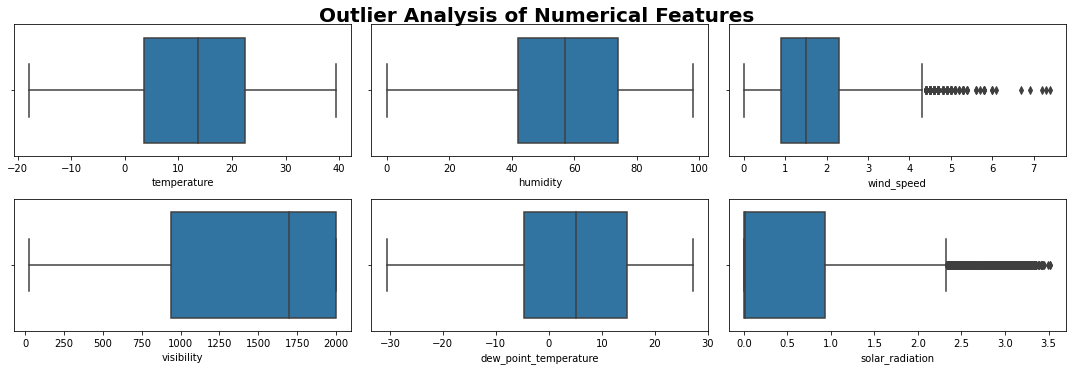

In [ ]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)            # subplot of 2 rows and 3 columns

  # countplot
  sns.boxplot(bike_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:** 
* Outliers are visible in the 'wind_speed', and 'solar_radiation' columns.

* Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method.

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [ ]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(bike_df):
    for col in bike_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)
    return bike_df

In [ ]:
# using the function to treat outliers
bike_df = clip_outliers(bike_df)

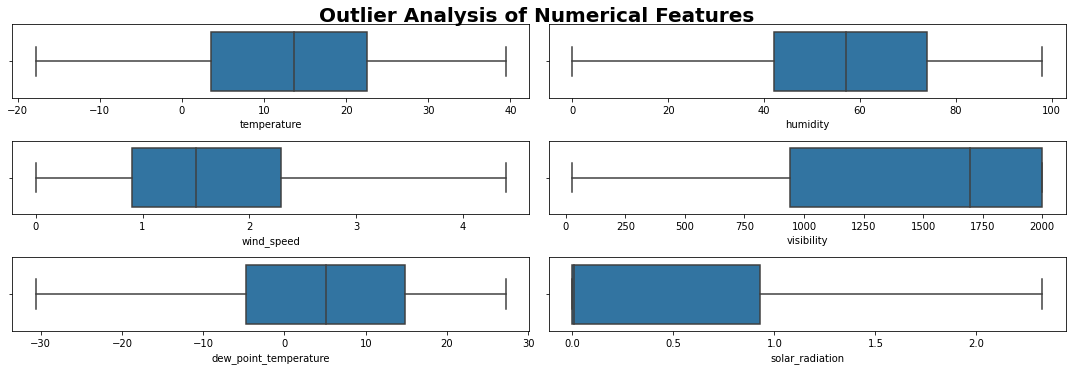

In [ ]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)            # subplot of 3 rows and 2 columns

  # countplot
  sns.boxplot(bike_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

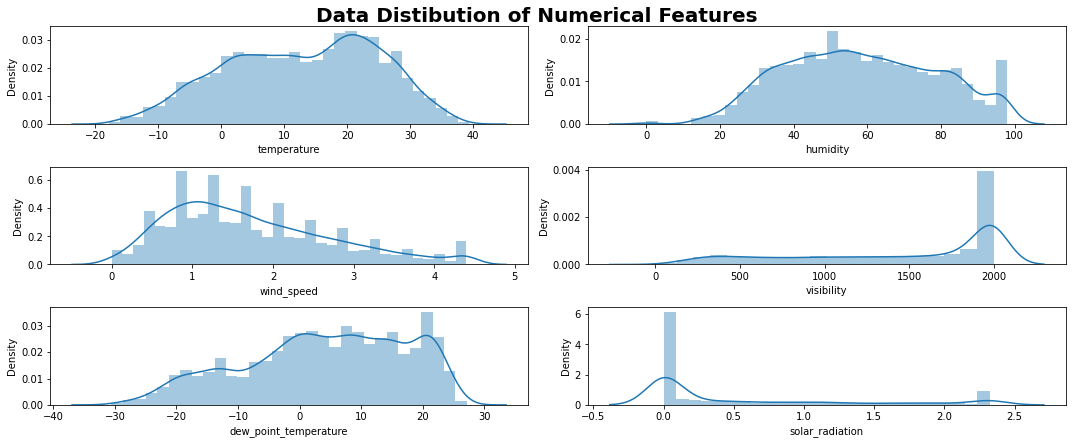

In [ ]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)                       # subplots 3 rows, 2 columns

  # dist plots
  sns.distplot(bike_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    

* We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

## **6. Feature Engineering**

* Feature engineering is the process of creating new features from existing ones to improve the performance of a machine learning model. This involves transforming raw data into a more useful and informative form, by either creating new features from the existing data, or selecting only the most relevant features from the raw data. 
* The goal of feature engineering is to extract relevant information from the raw data and represent it in a way that can be easily understood by the machine learning model. The success of a machine learning model depends heavily on the quality of the features used as inputs, so feature engineering plays an important role in model performance.

### **6.1 Regression plot**

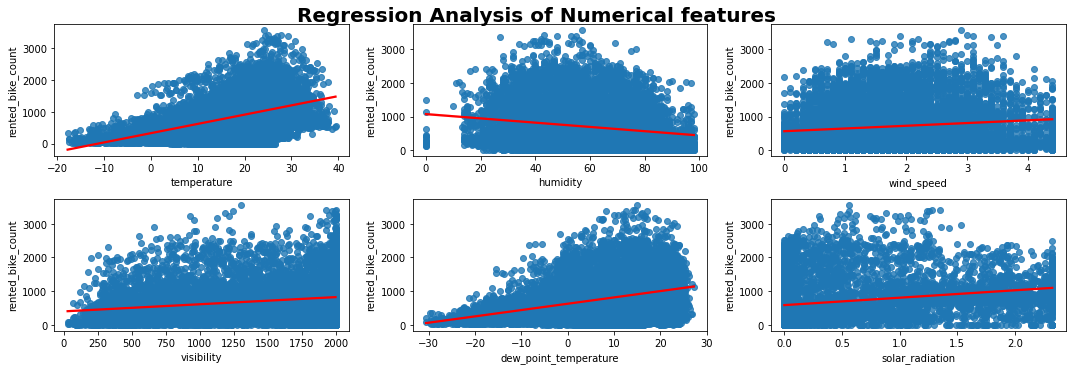

In [ ]:
# Checking Linearity of all numerical features with our target variable

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                     # subplots of 2 rows and 3 columns

  # regression plots
  sns.regplot(x=bike_df[col], y='rented_bike_count', data=bike_df, line_kws={"color":"r"})
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()

* Most of the numerical features are positively corelated to our target variable.

### **6.2 Correlation Coefficient and Heatmap**

* The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

* The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

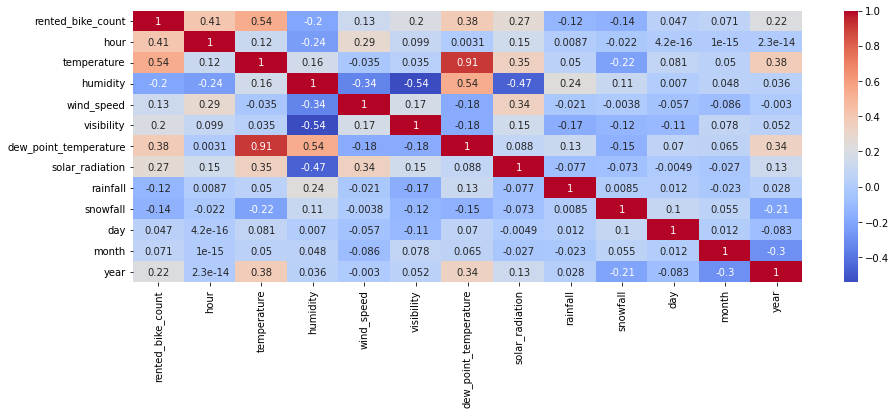

In [ ]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(bike_df.corr(), annot=True, cmap='coolwarm')     

In [ ]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# checking the highly correlated features
correlation(bike_df, 0.7)          # setting threshold of 0.7

{'dew_point_temperature'}

* Since dew_point_temperature and temperature has correlation coefficient of 0.91 and dew_point_temperature is less correlated to our target variable hence dropping dew_point_temperature.

In [ ]:
# droping dew_point_temperature column due to multi-collinearity

bike_df.drop('dew_point_temperature', axis=1, inplace=True)

### **6.3 VIF**

VIF (Variance Inflation Factor) analysis is a statistical method used to identify multicollinearity in a set of predictor variables. Multicollinearity is a situation where two or more predictor variables in a regression model are highly correlated with each other, meaning that they provide redundant information about the response variable.

VIF analysis is an important step in the development of a regression model, as it helps to ensure that the results are reliable and interpretable, and that the predictor variables are not providing redundant information.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns
  
  return vif

In [ ]:
calc_vif(bike_df[[i for i in bike_df.describe().columns]])

,VIF Factor,features
0,4.152630,rented_bike_count
1,5.055598,hour
2,4.967449,temperature
3,24.956820,humidity
4,5.052784,wind_speed
5,10.660305,visibility
6,2.904267,solar_radiation
7,1.110419,rainfall
8,1.147299,snowfall
9,4.419318,day


Since VIF factor of 'year' is too large hence we will remove year from our data to build our model.

In [ ]:
# droping year column due to multi-collinearity

bike_df.drop('year', axis=1, inplace=True)

# dropping columns those were created for EDA purpose only
bike_df.drop('weekday', axis=1, inplace=True)
bike_df.drop('session', axis=1, inplace=True)


In [ ]:
# Calculating the VIF again
calc_vif(bike_df[[i for i in bike_df.describe().columns]])


,VIF Factor,features
0,4.112963,rented_bike_count
1,4.717261,hour
2,4.455828,temperature
3,7.106271,humidity
4,4.833217,wind_speed
5,5.554467,visibility
6,2.368061,solar_radiation
7,1.104537,rainfall
8,1.136376,snowfall
9,3.859202,day


These are our final nemerical variables to be considered for model building.

### **6.4 Encoding**

Encoding is a technique in feature engineering that is used to convert categorical variables into numerical values that can be used by machine learning algorithms.

There are several encoding techniques, including:

* One-hot encoding: creates a binary column for each unique category, with a value of 1 indicating the presence of the category and 0 indicating the absence.
* Label encoding: assigns a unique integer value to each category.
* Ordinal encoding: assigns an ordered integer value to each category based on the natural ordering of the categories.
* Count encoding: replaces a categorical value with the number of times it appears in the dataset.

**Since we have created some feature for EDA which are not providing any additional information to our Model hence we are dropping those features**

In [ ]:
# removing year from categorical_features list
categorical_features.remove('year')
categorical_features.remove('weekday')
categorical_features.remove('session')

# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("No. of unique values in",i,"is",bike_df[i].nunique())

No. of unique values in hour is 24
No. of unique values in seasons is 4
No. of unique values in holiday is 2
No. of unique values in functioning_day is 2
No. of unique values in day is 31
No. of unique values in month is 12


We will use One hot encoding for 'seasons' and  Numeric encoding for 'holiday' and 'functioning_day'. Other columns are already encoded. 

In [ ]:
#One Hot Encoding

# one-hot encode the 'seasons', 'weekday' and 'session' feature
seasons_onehot = pd.get_dummies(bike_df['seasons'], prefix='seasons')

# drop the original features
bike_df.drop('seasons', axis=1, inplace=True)

# concatenate the one-hot encoded education feature with the rest of the data
bike_df = pd.concat([bike_df, seasons_onehot], axis=1)

In [ ]:
# Numerical Encoding

bike_df['holiday'] = bike_df['holiday'].map({'Holiday': 1, 'No Holiday': 0})
bike_df['functioning_day'] = bike_df['functioning_day'].map({'Yes': 1, 'No': 0})

### **6.5 Normalization of Target Variable**

A fundamental component of data mining is data normalization, also known as data pre-processing. It refers to transforming the data, specifically converting the source data into a different format that makes it possible to effectively process the data. Data normalization's primary goal is to reduce or even eliminate duplicate data.

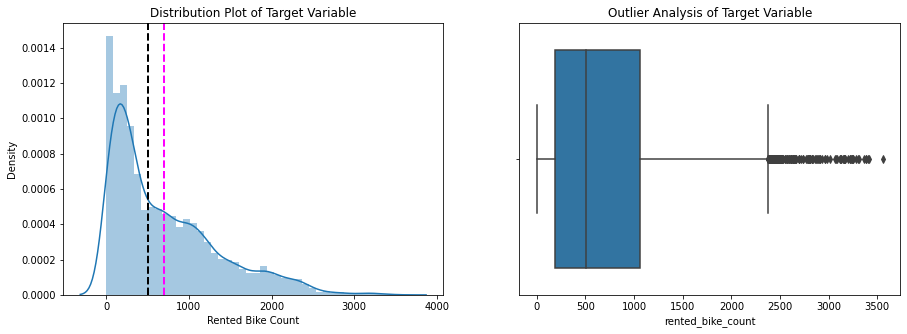

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(bike_df['rented_bike_count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# mean line
dist.axvline(bike_df['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(bike_df['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(bike_df.rented_bike_count, ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

**Observation**
* The graph above indicates that the Rented Bike Count has a moderate right skewness. Linear regression assumes that the dependent variable has a normal distribution, therefore, to meet this assumption, we need to take some measures to normalize the distribution.
* The boxplot above indicates that there are outliers in the rented bike count column.

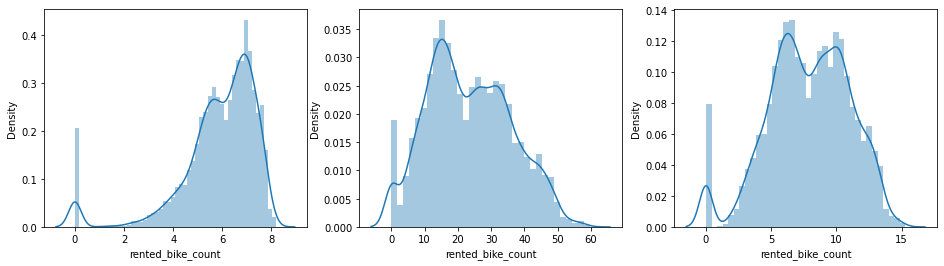

In [ ]:
# checking for best transformation for target variable
fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.distplot(np.log1p(bike_df['rented_bike_count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(bike_df['rented_bike_count']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(bike_df['rented_bike_count']),kde=True, ax=axs[2])

**Observations**

* Applying a logarithmic transformation to the dependent variable did not help much as it resulted in a negatively skewed distribution. 
* Square root and cube root transformations were attempted, but they did not result in a normally distributed variable. 
* Therefore, we will use a square root transformation for the regression as it transformed the variable into a well-distributed form.

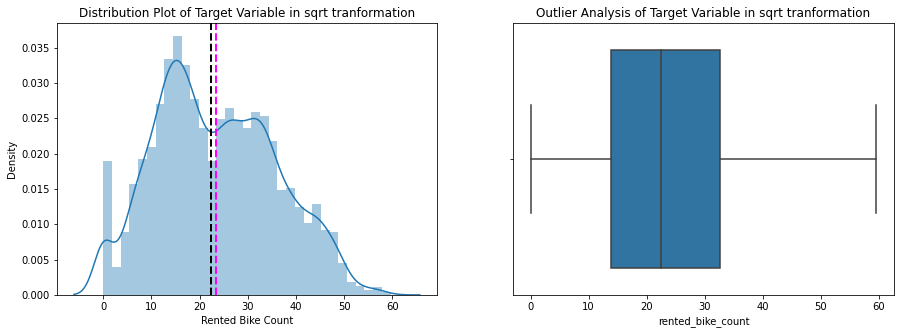

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(bike_df['rented_bike_count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# mean line
dist.axvline(np.sqrt(bike_df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(np.sqrt(bike_df['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(np.sqrt(bike_df.rented_bike_count), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

**Observation**
* By applying the square root transformation to the skewed Rented Bike Count, we were able to obtain an almost normal distribution, which is in line with the general rule that skewed variables should be normalized in linear regression.
* We find that there are no outliers in the Rented Bike Count column after applying square root transformation.

#### Manipulations done and insights found

* We did some basic data manipulations and renamed complex column names. 
* We checked for missing and duplicate values.
* We extracted and created 3 columns from the date which are year, month, and day. 
* From the day column, we created the weekend column to better understand the weekend demand of bike sharing count.
* We also changed the data type of the variables and converted a few variables into categorical columns which are necessary for the model to understand. We have to map them into an integer so that we can pass them into our model which we will do later.
* We will get a clear view of the bike-sharing demand through graphical representations in the next sections


## **7. Model Building**

### **7.1 Train Test Split**

In [ ]:
X = bike_df.drop('rented_bike_count', axis=1)
y= np.sqrt(bike_df['rented_bike_count'])

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


### **7.2 Scaling Data**

In [ ]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Evaluation Metrics Used -**
* The mean squared error (MSE):- It tells you how close a regression line is to a set of points.

* Root Mean Square Error (RMSE):- It is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE):- These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2):- It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Adjusted R-squared:- It is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


### **7.3 Model Training**

In [ ]:
# empty list for appending performance metric score 
model_result = []

def predict(ml_model,model_name):

  '''
  Pass the model and predict value. 
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting different graphs for test data.
  ''' 

  # model fitting
  model = ml_model.fit(X_train,y_train)

  # predicting value
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Reverse the transformation on the predictions    (In case if we need y_train_pred in original and transformed way)
  y_train_pred_transformed = np.power(y_train_pred, 2)
  y_test_pred_transformed = np.power(y_test_pred, 2)

  # graph --> best fit line on test data
  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'red'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*150)

  # graph---> actual vs predicted on test data
  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*150)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*150)

  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})

## **8. Model Implementation**

### **8.1 Linear Regression**

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal is to find the best-fitting line that can predict the value of the dependent variable based on the values of the independent variables.

train MSE : 54.12
train RMSE : 7.357
train MAE : 5.639
train R2 : 0.653
train Adj R2 : 0.652
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.111
test RMSE : 7.288
test MAE : 5.62
test R2 : 0.648
test Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------------------------------------


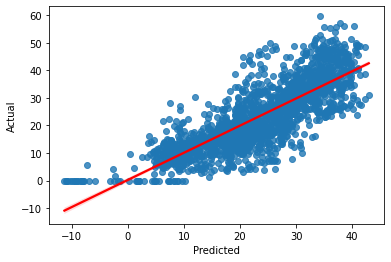

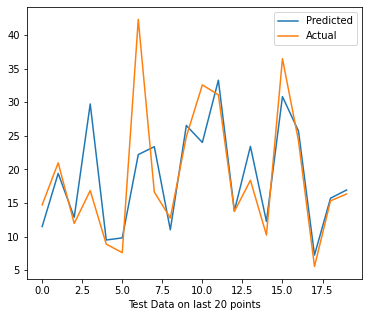

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.500844  19.407814  12.873395  29.737243  9.502783
error       3.230076   1.568363  -0.915134 -12.884943 -0.614588
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(LinearRegression(), 'LinearRegression')

### **8.2 Lasso** 

Lasso (Least Absolute Shrinkage and Selection Operator) is a regularization technique used in linear regression models. It helps to reduce the complexity of the model and improve its generalization ability by penalizing the magnitude of coefficients of the features. 

The lasso regularization adds a penalty term to the loss function being optimized. The penalty term is proportional to the absolute magnitude of the coefficients, but unlike ridge regression, it shrinks the coefficients of some features to zero, effectively removing them from the model.

train MSE : 54.273
train RMSE : 7.367
train MAE : 5.648
train R2 : 0.652
train Adj R2 : 0.651
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.316
test RMSE : 7.302
test MAE : 5.636
test R2 : 0.647
test Adj R2 : 0.643
------------------------------------------------------------------------------------------------------------------------------------------------------


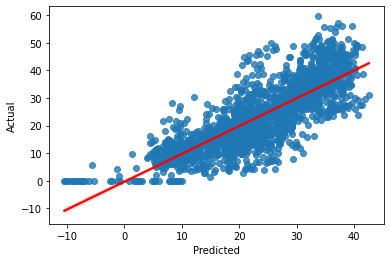

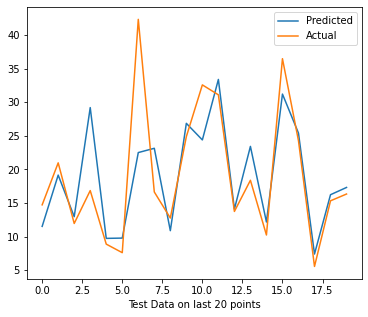

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.527884  19.156742  12.969024  29.194785  9.742650
error       3.203035   1.819435  -1.010763 -12.342486 -0.854456
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(Lasso(alpha=0.1, max_iter=1000), 'Lasso')

### **8.3 Ridge**

Ridge Regression is a type of regularized linear regression that aims to solve the problem of multicollinearity and overfitting by adding a penalty term to the loss function. The penalty term is the L2 regularization term (also known as the weight decay term), which adds a penalty proportional to the square of the magnitude of the coefficients.

train MSE : 54.119
train RMSE : 7.357
train MAPE : 911941604350722.0
train R2 : 0.653
train Adj R2 : 0.652
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.108
test RMSE : 7.288
test MAPE : 736553022984528.8
test R2 : 0.648
test Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------------------------------------


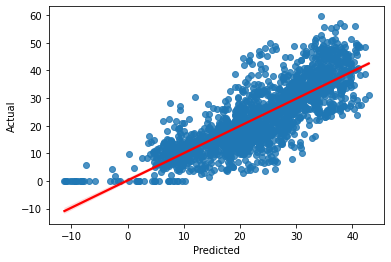

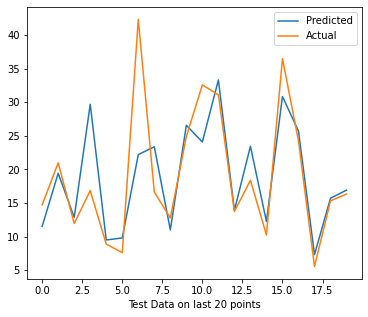

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.541139  19.427637  12.875583  29.687544  9.503152
error       3.189781   1.548540  -0.917322 -12.835244 -0.614958
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(Ridge(alpha=0.1, max_iter=1000), 'Ridge')

### **8.4 Elastic Net**

ElasticNet is a linear regression algorithm that combines both L1 (Lasso) and L2 (Ridge) regularization techniques. L1 and L2 regularization are methods used to prevent overfitting by adding penalty terms to the loss function that the algorithm minimizes. Lasso adds a penalty proportional to the absolute value of the coefficients, while Ridge adds a penalty proportional to the square of the coefficients.

train MSE : 54.593
train RMSE : 7.389
train MAPE : 891581680264145.2
train R2 : 0.65
train Adj R2 : 0.649
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.911
test RMSE : 7.342
test MAPE : 713177246455212.8
test R2 : 0.643
test Adj R2 : 0.639
------------------------------------------------------------------------------------------------------------------------------------------------------


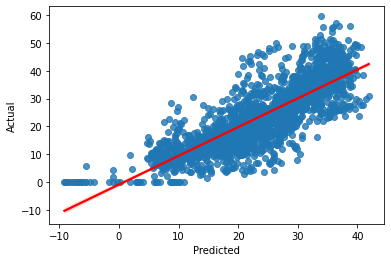

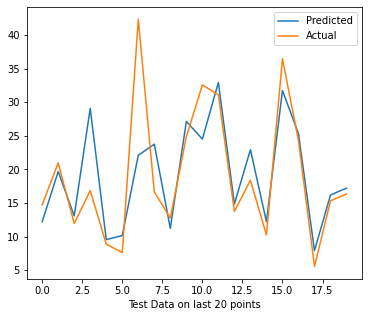

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  12.208831  19.684402  13.083575  29.085248  9.563631
error       2.522089   1.291775  -1.125315 -12.232948 -0.675436
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(ElasticNet(alpha=0.1, max_iter=1000), 'Elastic Net')

### **8.5 K-Nearest Neighbors**

A supervised machine learning algorithm known as KNN or K-nearest neighbor can be used to solve classification and regression problems. K is not a non-parametric nearest neighbor, i.e. It makes no assumptions regarding the assumptions that underlie the data. An input or unseen data set is categorized here by the algorithm based on the characteristics shared by the closest data points. The distance between two points determines these closest neighbors. The distance metric methods that are utilized can be Euclidean Distance, Manhattan Distance, Minkowski, Cosine Similarity Measure etc)

train MSE : 12.718
train RMSE : 3.566
train MAPE : 2764954607710.224
train R2 : 0.918
train Adj R2 : 0.918
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 26.575
test RMSE : 5.155
test MAPE : 0.198
test R2 : 0.824
test Adj R2 : 0.822
------------------------------------------------------------------------------------------------------------------------------------------------------


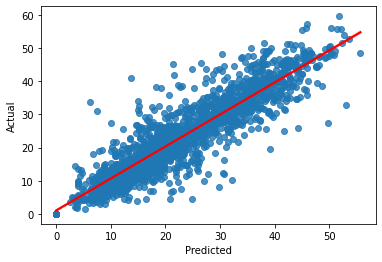

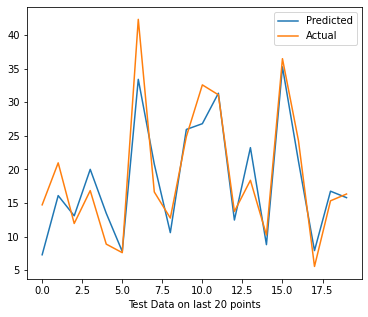

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict   7.304707  16.104447  13.096839  20.009112  13.478800
error       7.426213   4.871730  -1.138579  -3.156813  -4.590605
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(KNeighborsRegressor(n_neighbors=3),'KNN')

### **8.6 Support Vector Machine**

Support Vector Machine (SVM) is a popular and powerful machine learning algorithm for classification and regression problems. It is based on the concept of finding the best hyperplane that separates the data into classes, or predicts the target value for regression problems. 

train MSE : 20.542
train RMSE : 4.532
train MAPE : 13280659659620.389
train R2 : 0.868
train Adj R2 : 0.868
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 26.094
test RMSE : 5.108
test MAPE : 15734534963995.975
test R2 : 0.827
test Adj R2 : 0.825
------------------------------------------------------------------------------------------------------------------------------------------------------


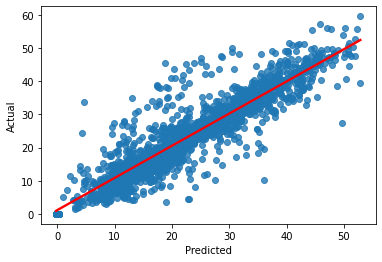

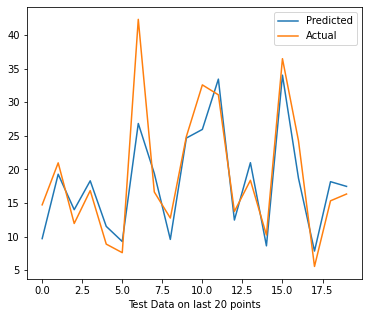

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict   9.706634  19.286284  14.011428  18.305715  11.528854
error       5.024286   1.689893  -2.053167  -1.453416  -2.640660
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(SVR(kernel='rbf',C=100), 'SVM')

### **8.7 Decision Tree**

A decision tree is a tree-like model used in machine learning to make predictions or decisions by breaking down a set of rules or conditions into smaller and smaller sub-conditions, based on the values of the input features.

Each node in the tree represents a test on a feature, and each branch represents the outcome of the test. The final branches of the tree, called the leaves, represent the class predictions or decisions. The tree is built recursively by finding the best feature to split the data based on the information gain or decrease in impurity at each node.

train MSE : 15.422
train RMSE : 3.927
train MAPE : 57009257529946.086
train R2 : 0.901
train Adj R2 : 0.901
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 20.416
test RMSE : 4.518
test MAPE : 98555771038935.1
test R2 : 0.865
test Adj R2 : 0.863
------------------------------------------------------------------------------------------------------------------------------------------------------


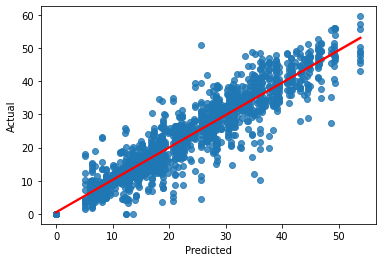

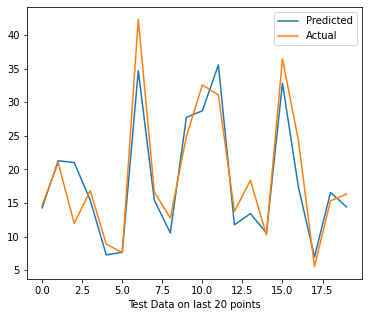

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.290624  21.283637  21.024986  15.430529  7.277687
error       0.440296  -0.307460  -9.066725   1.421771  1.610507
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3,max_depth=20, random_state=33), 'Decision Tree')

### **8.8 Random Forest**

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions to make a final classification or regression prediction. In contrast to a single decision tree, Random Forest reduces the risk of overfitting by combining the results of many trees, each built on a different subset of the data.

**Hyperparameter Tunning using GridSearchCV**

In [ ]:
param_grid = {'n_estimators': [50,80],     # number of trees in the ensemble
             'max_depth': [15,20],        # maximum number of levels allowed in each tree.
             'min_samples_split': [5,15],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=2, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2', verbose=1)

In [ ]:
# Get the best parameters from the grid search
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=15,
                      n_estimators=80)

train MSE : 8.081
train RMSE : 2.843
train MAPE : 19391270735659.902
train R2 : 0.948
train Adj R2 : 0.948
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 15.237
test RMSE : 3.903
test MAPE : 29380076567706.36
test R2 : 0.899
test Adj R2 : 0.898
------------------------------------------------------------------------------------------------------------------------------------------------------


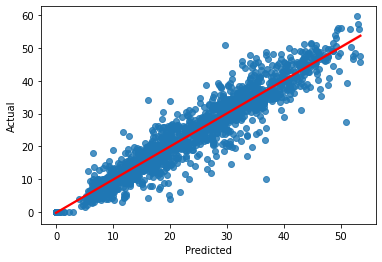

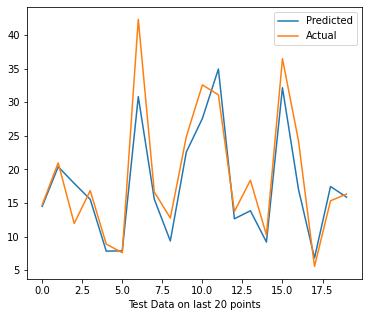

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.495472  20.390757  17.927689  15.544204  7.841784
error       0.235447   0.585420  -5.969429   1.308095  1.046411
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(rf_optimal_model, 'Random Forest')

In [ ]:
# feature importance 
importances = rf_optimal_model.feature_importances_

#Creating a dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
1,temperature,0.277715
0,hour,0.261624
9,functioning_day,0.179332
6,rainfall,0.085942
2,humidity,0.068759
15,seasons_Winter,0.049026
5,solar_radiation,0.029394
12,seasons_Autumn,0.009298
10,day,0.008892
4,visibility,0.008172


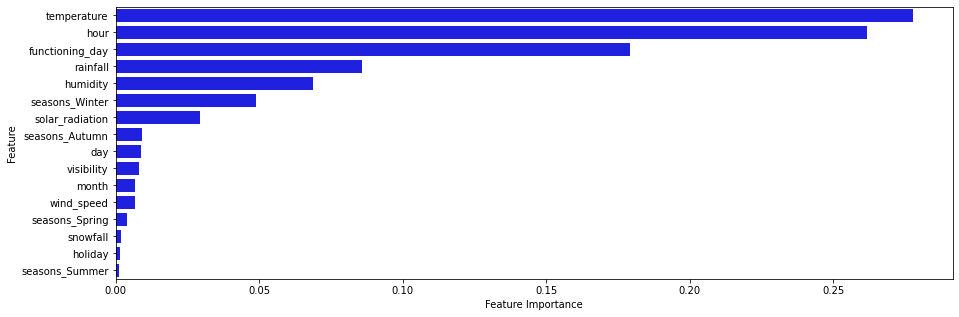

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

### **8.9 AdaBoost**

AdaBoost (Adaptive Boosting) is an ensemble machine learning algorithm that combines multiple weak models to form a stronger model. It works by assigning weights to the data points in a dataset and iteratively building weak models that try to correctly classify or predict the target variable. After each iteration, the weights of the misclassified or mispredicted data points are increased, making it more likely that the next weak model will focus on these points.

train MSE : 2.248
train RMSE : 1.499
train MAPE : 0.057
train R2 : 0.986
train Adj R2 : 0.986
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 14.13
test RMSE : 3.759
test MAPE : 0.143
test R2 : 0.906
test Adj R2 : 0.905
------------------------------------------------------------------------------------------------------------------------------------------------------


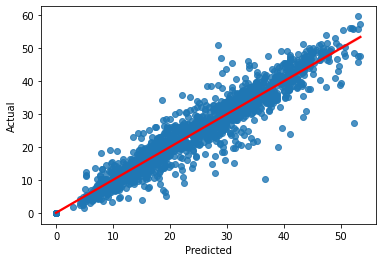

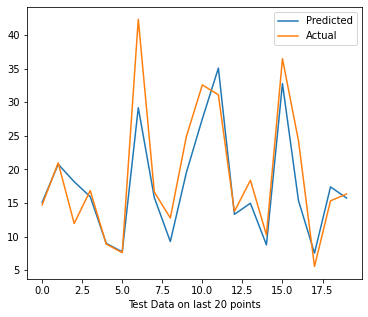

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  15.099669  20.764905  18.169415  15.943072  8.990378
error      -0.368749   0.211272  -6.211154   0.909228 -0.102183
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Create a base decision tree regression model
dt = DecisionTreeRegressor(max_depth=12)

# Initialize the AdaBoost regression model
ada = AdaBoostRegressor(base_estimator=dt, n_estimators=60, learning_rate=1, random_state =33)

# Predict using function
predict(ada, 'AdaBoost')

### **8.10 Xtreme Gradient Boosting**

XGBoost (eXtreme Gradient Boosting) is an optimized implementation of the Gradient Boosting algorithm that is specifically designed for large-scale and complex data. XGBoost is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make a final prediction.

**HyperParameter Tunning using GridSearchCV**

In [ ]:
param_grid = {'n_estimators': [300,500],     # number of trees in the ensemble
             'max_depth': [7,8],        # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
xgb = XGBRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, verbose=2, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[11:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:24] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [300, 500]},
             scoring='r2', verbose=1)

In [ ]:
# Get the best parameters from the grid search
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

LGBMRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=3,
              n_estimators=600)

[11:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train MSE : 0.696
train RMSE : 0.834
train MAPE : 23742032190777.305
train R2 : 0.996
train Adj R2 : 0.996
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 11.178
test RMSE : 3.343
test MAPE : 87868736202611.83
test R2 : 0.926
test Adj R2 : 0.925
------------------------------------------------------------------------------------------------------------------------------------------------------


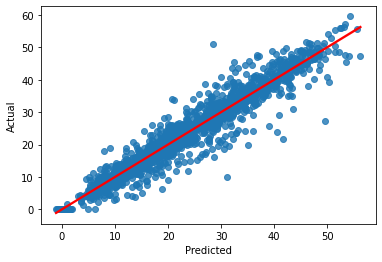

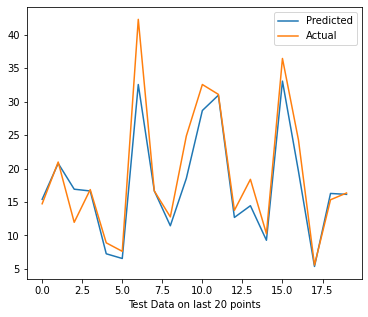

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897       5813      1708
y_actual   14.730920  20.976177  11.958261  16.85230  8.888194
y_predict  15.399032  20.774426  16.910759  16.64382  7.249547
error      -0.668112   0.201751  -4.952498   0.20848  1.638647
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(xgb_optimal_model, 'XGB')

In [ ]:
# feature importance 
importances = xgb_optimal_model.feature_importances_

#Creating a dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
15,seasons_Winter,0.495704
9,functioning_day,0.353925
6,rainfall,0.063224
0,hour,0.018187
12,seasons_Autumn,0.018104
1,temperature,0.017737
2,humidity,0.007075
5,solar_radiation,0.005660
8,holiday,0.005177
13,seasons_Spring,0.003196


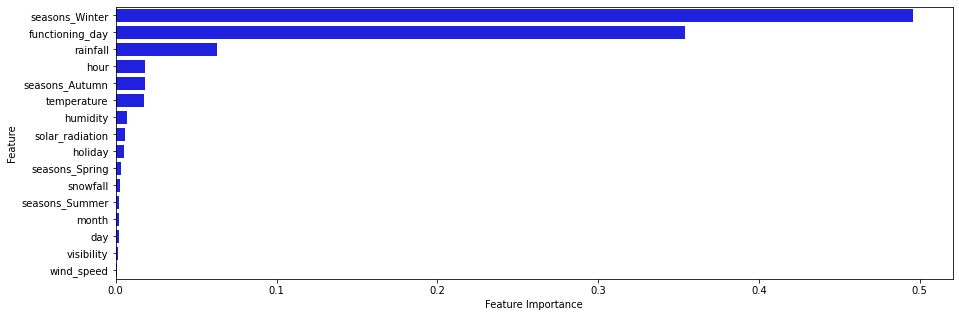

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

### **8.11 Light GBM**

LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be more efficient than traditional gradient boosting algorithms and is particularly well-suited for large datasets.LightGBM is an open-source library that was developed by Microsoft. 

One of the key features of LightGBM is its use of a histogram-based approach to split nodes in decision trees. 

**HyperParameter Tunning using GridSearchCV**

In [ ]:
param_grid = {'n_estimators': [600,800],     # number of trees in the ensemble
             'max_depth': [8,10],        # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [2,3]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
lgb = LGBMRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(lgb, param_grid=param_grid, cv=5, verbose=2, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   1.7s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   1.9s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   1.8s
[CV] END max_depth=8, min_samples_leaf=

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5],
                         'n_estimators': [600, 800]},
             scoring='r2', verbose=2)

In [ ]:
# Get the best parameters from the grid search
lgb_optimal_model = grid_search.best_estimator_
lgb_optimal_model

LGBMRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=3,
              n_estimators=600)

train MSE : 1.935
train RMSE : 1.391
train MAE : 0.972
train R2 : 0.988
train Adj R2 : 0.988
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 11.267
test RMSE : 3.357
test MAE : 2.278
test R2 : 0.925
test Adj R2 : 0.925
------------------------------------------------------------------------------------------------------------------------------------------------------


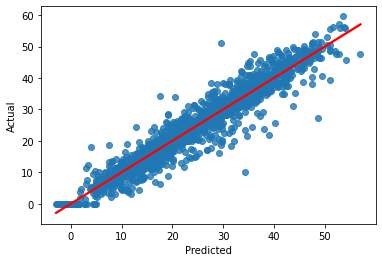

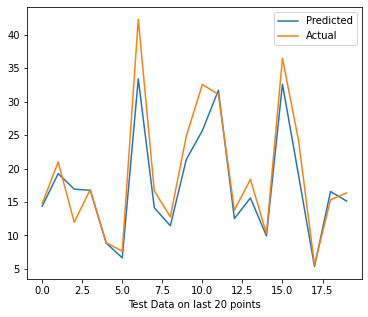

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.359859  19.243984  16.915246  16.744759  8.835262
error       0.371061   1.732193  -4.956985   0.107540  0.052932
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(lgb_optimal_model, 'LGB')

In [ ]:
# feature importance 
importances = lgb_optimal_model.feature_importances_

#Creating a dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
1,temperature,3180
2,humidity,2482
4,visibility,2330
0,hour,2128
10,day,1898
5,solar_radiation,1822
3,wind_speed,1677
11,month,1189
6,rainfall,386
12,seasons_Autumn,159


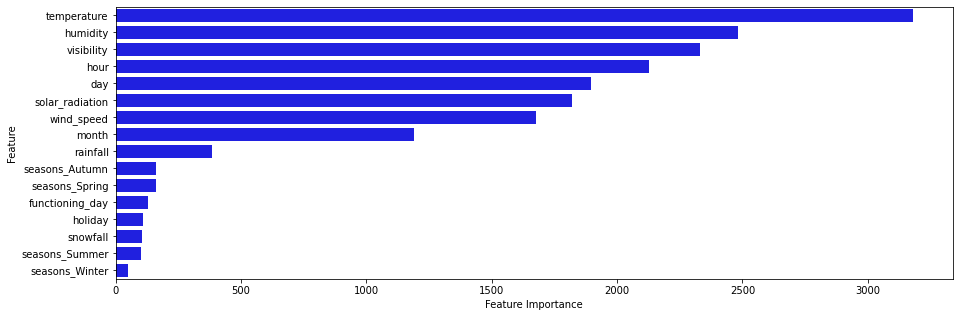

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

### **8.12 Model Result**

In [ ]:
model_result = pd.DataFrame(model_result)
model_result = round(model_result,3)
model_result.sort_values(by='test R2', ascending=False)

,model,train MSE,test MSE,train RMSE,test RMSE,train MAPE,test MAPE,train R2,test R2,train Adj R2,test Adj R2
9,XGB,0.696,11.178,0.834,3.343,2.374203e+13,8.786874e+13,0.996,0.926,0.996,0.925
10,LGB,2.249,11.299,1.500,3.361,9.671829e+13,1.592967e+14,0.986,0.925,0.986,0.924
8,AdaBoost,2.248,14.130,1.499,3.759,5.700000e-02,1.430000e-01,0.986,0.906,0.986,0.905
7,Random Forest,4.977,14.779,2.231,3.844,1.684953e+13,3.874248e+13,0.968,0.902,0.968,0.901
6,Decision Tree,15.422,20.416,3.927,4.518,5.700926e+13,9.855577e+13,0.901,0.865,0.901,0.863
5,SVM,20.542,26.094,4.532,5.108,1.328066e+13,1.573453e+13,0.868,0.827,0.868,0.825
4,KNN,12.718,26.575,3.566,5.155,2.764955e+12,1.980000e-01,0.918,0.824,0.918,0.822
0,LinearRegression,54.120,53.111,7.357,7.288,9.127219e+14,7.358606e+14,0.653,0.648,0.652,0.645
2,Ridge,54.119,53.108,7.357,7.288,9.119416e+14,7.365530e+14,0.653,0.648,0.652,0.645
1,Lasso,54.273,53.316,7.367,7.302,8.991045e+14,7.236050e+14,0.652,0.647,0.651,0.643


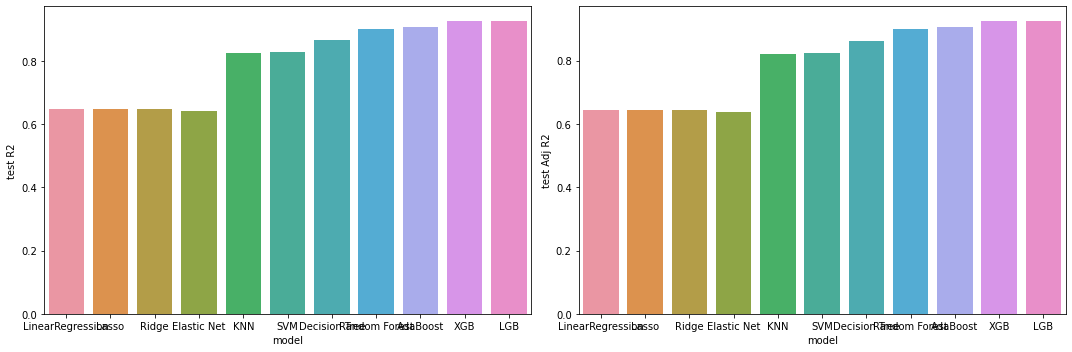

In [ ]:
# plotting graph to compare model performance of all the models
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test R2'], ax=ax[0])           # Model Vs test R2
sns.barplot(x=model_result['model'], y=model_result['test Adj R2'], ax=ax[1])       # Model Vs test Adj R2
plt.tight_layout()

From above result table we select LGBMRegressor_tuning as final model, because it has lowest RMSE value as well as highest R2 score on the test data.  

For the following reasons, I would choose Random Forest.
* One of the best R2 scores for the Test Set (0.92) and the Training Set (0.99)
* Test RMSE and training RMSE were the lowest.
* Test MAE and Training MAE are the lowest.
* A single model that can be used on both business days and weekends.
* Lowest Overfit (the Train RMSE is more comparable to the Test RMSE).
* Lesser opportunity to prepare because of a lesser number of elements.
* Random Forest takes less time to train and test than Gradient Boosting with GridSearch CV, a good model, but Gradient Boosting with GridSearch CV takes more time to train.

The R square is calculated by replacing the calculated prediction with the mean by dividing the sum of the squared prediction error by the total sum of the squares. The R Square worth reaches from 0 to 1, and a higher worth shows that the forecast and genuine worth are all the more firmly adjusted.


The fit of the model to the dependent variables can be evaluated using the R square measure. On the other hand, overfitting is not taken into consideration. If there are a lot of independent variables in the regression model, it may work well with training data but fail with testing data because it is too complicated. Adjusted R Square is a new metric that penalizes additional independent variables added to the model and adjusts the metric to prevent overfitting.

Because it estimates the relationship between the movements of a dependent variable and those of an independent variable, R square is the best evaluation method for predicting the rented_bike_count. 

##**9. Conclusion**

### **Summary**

We began our analysis by performing EDA on all of our datasets. First, we looked at and changed our dependent variable, "Rental Bike Count." After that, we looked at categorical variables and eliminated those that represented the majority of one class. We also looked at numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, we hot-encoded the categorical variables and removed some numerical features that primarily had 0 values.

Following that, we examine several well-known individual models, ranging from straightforward ensemble models like Random Forest and Gradient Boost to more complex ones like the Linear Regressor and Regularization Models (Ridge and Lasso). A single, unified model for working and nonworking days was also one of the few model formulation options tested.

Linear Regression, Lasso, Ridge, Elastic net, Decision Tree, Random Forest, and XGBoost were the next eight machine learning algorithms we used. To enhance the performance of our model, we performed hyperparameter tuning.

###**Conclusion**

1. Here are some solutions to manage Bike Sharing Demand ⏬

* Create a portfolio of regular customers.
* The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.
* While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.
* Start a new renting program for premium customers to increase business.
* Utilize the ML model to cater to demand efficiently.
* Be ready for 2 kinds of patterns in demand which are for a working day and a non- working day.
*  Maintenance activities for bikes should be done at night due to low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers.
* Try to get the bookings as early as possible to manage the demand.
* May start giving discounts to bookings if they book bike in advance.
* Be proactive with communication. Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problems with the service.
* Lean into the best customers.
* Solving Poor Network Connectivity Issues.
* Define a roadmap for new customers.
* Stay competitive.

2. We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count is high at peak office hours (8 am and 5 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.
3. Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.
4. Temperature: People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius
5. Season: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.
6. Weather: As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
7. Humidity: With increasing humidity, we see a decrease in the bike rental count.
8. I have chosen the Random Forest model which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models, decision trees, Random Forests, and Gradient Boost techniques were used to improve accuracy. I compared R2 metrics to choose a model.
9. No overfitting is seen in our model.
10. Due to less no. of data in the dataset, the training R2 score is around 99% and the test R2 score is 92%. Once we get more data we can retrain our algorithm for better performance.

### **Way Forward**

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***